目标函数：

In [3]:
def LSM(X,y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y    # X.T @ X等价与X.T.dot(X)
    return w 

权重 [0.84782784]
截距 -0.7251489775339065
实际值: [-4.73247428  6.13706655 -8.38719666  0.43861038  3.31638283  7.23801649
 -5.72548572  2.69794063  0.03863616  7.4464179 ]
预测值: [-4.75019023  5.52651084 -8.86087066  0.21688195  3.64244898  6.7254593
 -6.46297374  3.29989228  0.0456036   7.068016  ]
平均方误差（MSM）： 0.29153732828127227
根均方误差（RMSE）： 0.4134023373692711
平均绝对值误差（MAE）： 0.9886823092385241
实际权重: [29.21475268 96.19363785]
模型权重： [29.21475268 96.19363785]
截距： 5.500000000000005
均方误差： 4.424904886946024e-14
训练集R^2： 1.0
训练集R^2： 1.0


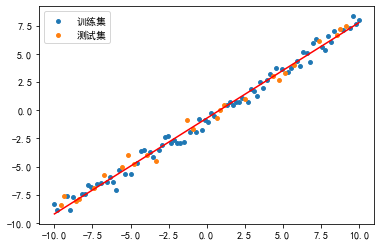

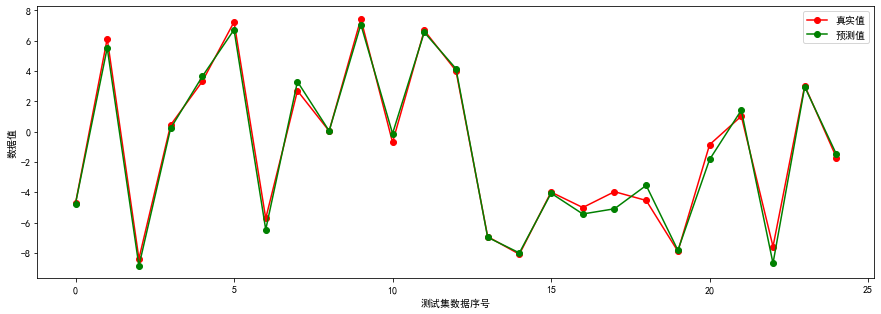

In [14]:
# 一元线性回归程序
import numpy as np    # 基本工具导入
from sklearn.linear_model import LinearRegression    # 导入科学计算包中的线性模块函数的线性回归函数
from sklearn.model_selection import train_test_split    # 导入方法选择模块中用于切分测试集和训练集的函数

# 构建数据
np.random.seed(0)
x = np.linspace(-10,10,100)
y = 0.85*x - 0.72    # 设置一个线性回归公式
e = np.random.normal(loc = 0,scale = 0.5,size = x.shape)    # 创建一组数量为100，均值为0.5的随机数数组
y += e    # 将变量y加上这个变量e

x = x.reshape(-1,1)    # 将x转换为二维数组，因为fit方法要求x为二维结构
lr = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

# 拟合数据
lr.fit(X_train,y_train)
print('权重',lr.coef_)
print('截距',lr.intercept_)

# 定义一个预测函数
y_hat = lr.predict(X_test)
print('实际值:',y_test.ravel()[:10])
print('预测值:',y_hat[:10])


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

plt.scatter(X_train,y_train,s=15,label='训练集')
plt.scatter(X_test,y_test,s=15,label='测试集')
plt.plot(x,lr.predict(x),"r-")
plt.legend()


# 用图标表示出真实值与预测值
plt.figure(figsize = (15,5))
plt.plot(y_test,label = "真实值",color = "r",marker = "o")
plt.plot(y_hat,label = "预测值",color = "g",marker = "o")
plt.xlabel("测试集数据序号")
plt.ylabel("数据值")
plt.legend()


# 线性回归模型评估
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("平均方误差（MSM）：",mean_squared_error(y_test,y_hat))
print("根均方误差（RMSE）：",mean_absolute_error(y_test,y_hat))
print("平均绝对值误差（MAE）：",r2_score(y_test,y_hat))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X,y,coef = make_regression(n_samples = 100,n_features = 2,coef = True,bias = 5.5,random_state = 0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)
print("实际权重:",coef)
lr = LinearRegression()
lr.fit(X_train,y_train)
print("模型权重：",lr.coef_)
print("截距：",lr.intercept_)
y_hat = lr.predict(X_test)
print("均方误差：",mean_absolute_error(y_test,y_hat))
print("训练集R^2：",lr.score(X_train,y_train))
print("训练集R^2：",lr.score(X_test,y_test))